# Question 1.	
### Download the dataset here: https://www.kaggle.com/sohier/calcofi and create one DataFrame for the bottle file and another for the cast file. Perform preprocessing on this dataset. You do not need to do all six types of preprocessing we discussed. For this dataset, 2-3 is all you need. 

### (Note: I found the WMO Weather single-digit codes here: http://dss.ucar.edu/datasets/ds464.0/docs/WMOtables.html )
____________________________________________________________________________

### Preprocessing Data for Machine Learning Includes:
1. Cleaning up null values
2. Data cleaning (dashes, odd characters, etc.)<br>
    a. Handle missing data<br>
    b. Remove extreme outliers
3. One-Hot encoding
4. Convert Categorical values to numerical (sometimes that is the same as # 3)
5. Standardiztion/Normalization
6. Deal with multicollinearity (can be caused by 3)
______________________________________________________________________

##  *Insight Learned: Before preprocessing, look at what kind of information is in the data, and understand what question is being asked. This will aid in the preprocessing decisions.*
### Example: 
* **Cast Table**   = Information about site where bottles were dropped: ship, place, time, and weather
* **Bottle Table** = Information about depth bottle was placed, duration, and results of composition of water collected
* **Here, the question would be "How much of a connection is there between surface weather and water composition?"**
* Note: I went a little bit down the rabbit hole to find out what each measurement actually meant
____________________________________________________________________________________

 ## Table of Contents for Question 1
 
 * IMPORT MODULES & MISC
 
 Pt. 1. Bottle File Preprocessing
        a. CREATE DATAFRAME for bottle.csv
        b. LOOK AT DATA in bottle_df
        c. REMOVE ALL BUT NEEDED COLUMNS from bottle_df - pruning
        d. CLEAN UP NULL VALUES - bottle_p3 dataframe
        e. CLEAN UP NULL VALUES - bottle_n1 dataframe
        f. STANDARDIZATION/NORMALIZATION for bottle_n2 - remove outliers
        g. STANDARDIZATION/NORMALIZATION for bottle_n3 - scaling
 Pt. 2 Cast File Preprocecssing
        a. CREATE DATAFRAME for cast.csv
        b. LOOK AT DATA in cast_df
        c. REMOVE ALL BUT NEEDED COLUMNS from cast_df - pruning
        d. CLEAN UP NULL VALUES - cast_p6 dataframe
        e. STANDARDIZATION/NORMALIZATION for cast_n1 - Scaling    

In [1]:
# IMPORT MODULES & MISC.

import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# To get the Jupyter Notbook to show more of the rows
pd.options.display.max_rows = 999

# 1 Part I. Bottle File Preprocessing

### CalCOFI Database Tables Table Description - Bottle Table
https://new.data.calcofi.org/index.php/database/calcofi-database/bottle-field-descriptions

In [2]:
# a. CREATE DATAFRAME for bottle.csv

# create a data frame
bottle_df = pd.read_csv("bottle.csv")
bottle_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# b. 1. LOOK AT DATA in bottle_df - datatypes

bottle_df.dtypes

# float64, int64, obj

Cst_Cnt                  int64
Btl_Cnt                  int64
Sta_ID                  object
Depth_ID                object
Depthm                   int64
T_degC                 float64
Salnty                 float64
O2ml_L                 float64
STheta                 float64
O2Sat                  float64
Oxy_µmol/Kg            float64
BtlNum                 float64
RecInd                   int64
T_prec                 float64
T_qual                 float64
S_prec                 float64
S_qual                 float64
P_qual                 float64
O_qual                 float64
SThtaq                 float64
O2Satq                 float64
ChlorA                 float64
Chlqua                 float64
Phaeop                 float64
Phaqua                 float64
PO4uM                  float64
PO4q                   float64
SiO3uM                 float64
SiO3qu                 float64
NO2uM                  float64
NO2q                   float64
NO3uM                  float64
NO3q    

In [4]:
# b. 2. LOOK AT DATA in bottle_df - describe

bottle_df.describe()

# rows    = 864,863
# columns = 70

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [5]:
# b. 3. LOOK AT DATA in bottle_df - isnull().sum()

bottle_df.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
T_degC                  10963
Salnty                  47354
O2ml_L                 168662
STheta                  52689
O2Sat                  203589
Oxy_µmol/Kg            203595
BtlNum                 746196
RecInd                      0
T_prec                  10963
T_qual                 841736
S_prec                  47354
S_qual                 789949
P_qual                 191108
O_qual                 680187
SThtaq                 799040
O2Satq                 647066
ChlorA                 639591
Chlqua                 225697
Phaeop                 639592
Phaqua                 225693
PO4uM                  451546
PO4q                   413077
SiO3uM                 510772
SiO3qu                 353997
NO2uM                  527287
NO2q                   335389
NO3uM                  527460
NO3q                   334930
NH3uM     

In [6]:
# c. REMOVE ALL BUT NEEDED COLUMNS from bottle_df - pruning

# Columns to Keep
# R_Depth    - Reported depth in meters where water sample was collected
# R_TEMP     - Reported temperature in Celcius at depth where water sample was collected
# R_Salinity - Reported salinity (ocean water contains approx  35,000 ppm salt)
# R_SIGMA    - Reported potential density of water - density is important in causing currents and circulating heat
# R_SVA      - Reported specific volume anomaly - the difference of temperature & salinity of sample from reference ocean 
# R_O2       - Reported milliters of oxygen per liter of seawater
# R_SIO3     - Reported Silicate Concentration - used by marine creatures for their skeletons, incl. phytoplankton
# R_PO4      - Reported Phosphate Conentration - essential for plant life, but also prevents things like aglal bloom
# R_NO3      - Reported Nitrate Concentration - high levels mean contamination from fertilizer or wastewater - and can be
#                 associated with algal blooms and oxygen dead zones
# R_NO2      - Reported Nitrite Concentration - like nitrate, it comes from fertilizer through run-off water and sewage, 
#                 and can stimulate the growth of bacteria
# R_NH4      - Reported Ammonium Concentration - fish excretion, as well as animal decomposition
# R_CHLA     - Reported Chlorphyll-a in migrograms per liter - measure of the amount of algae growing in a waterbody
# R_PHAEO    - Reported Phaeophytin in micrograms per liter - used with chlorophyll, measures amount of algae growing
# R_PRES     - Reported Ocean Pressure in decibars

# Remove all columns between Cst_Cnt and LightP
bottle_p1 = bottle_df.drop(bottle_df.loc[:, 'Cst_Cnt':'LightP'].columns, axis = 1)

# Remove all columns between R_SAMP and DIC Quality Comment
bottle_p2 = bottle_p1.drop(bottle_p1.loc[:, 'R_SAMP':'DIC Quality Comment'].columns, axis = 1)

# Remove R_SVA, R_DYNHT, R_O2Sat
bottle_p3 = bottle_p2.drop(['R_DYNHT', 'R_O2Sat','R_POTEMP' ], axis = 1)

bottle_p3.isnull().sum()

R_Depth            0
R_TEMP         10963
R_SALINITY     47354
R_SIGMA        52856
R_SVA          52771
R_O2          168662
R_SIO3        510764
R_PO4         451538
R_NO3         527452
R_NO2         527279
R_NH4         799881
R_CHLA        639587
R_PHAEO       639588
R_PRES             0
dtype: int64

In [7]:
# d. CLEAN UP NULL VALUES - bottle_p3 dataframe

# 864,863 rows of data
# This is where the question comes in as to what data is important for reporting as that up to 92% of the data is missing
#     from a column

# Row count with no data (percentage of max rows):
# R_Depth            0   ( 0.0%)
# R_TEMP         10963   ( 1.3%) 
# R_SALINITY     47354   ( 5.5%)
# R_SIGMA        52856   ( 6.1%) - Water circulation marker
# R_SVA          52771   ( 6.1%) - Deviation from average salinity and temp
# R_O2          168662   (19.5%) - Available oxygen
# R_SIO3        510764   (59.1%) - Silicate - plankton marker (base of food pyramid in ocean)
# R_PO4         451538   (52.2%) - Phosphate - limits algal bloom
# R_NO3         527452   (61.0%) - Nitrate - contamination marker - encourages algal bloom
# R_NO2         527279   (61.0%) - Nitrite - contamination marker - encourages algal bloom
# R_NH4         799881   (92.5%) - Ammonium - sourced from fish excretion and dead animals 
# R_CHLA        639587   (74.0%) - Chlorphyll-a - amount of algae in sample
# R_PHAEO       639588   (74.0%) - Phaeophytin - twinned with Chlorophyll-a for detection of algae
# R_PRES             0   ( 0.0%)

# I'm going to go with the idea that the stakeholders are wanting to look at the algae risk
# R_NH4 (Ammonium) can be removed as it only notes presence of fish in the area (along with dead things)
# With Chlorophyll-a and Phaeophytin only being reported on 26% of the bottles, it measures algae.

# Remove R_NH4
bottle_n1 = bottle_p3.drop(['R_NH4'], axis = 1)

bottle_n1.isnull().sum()

R_Depth            0
R_TEMP         10963
R_SALINITY     47354
R_SIGMA        52856
R_SVA          52771
R_O2          168662
R_SIO3        510764
R_PO4         451538
R_NO3         527452
R_NO2         527279
R_CHLA        639587
R_PHAEO       639588
R_PRES             0
dtype: int64

In [8]:
# e.Bottle - CLEAN UP NULL VALUES - bottle_n1 dataframe

# remove rows with null values
bottle_n2 = bottle_n1.dropna()

bottle_n2.describe()

# row count drops from 864,863 to 207,191 - down to 24% of the original set

,R_Depth,R_TEMP,R_SALINITY,R_SIGMA,R_SVA,R_O2,R_SIO3,R_PO4,R_NO3,R_NO2,R_CHLA,R_PHAEO,R_PRES
count,207191.000000,207191.000000,207191.000000,207191.000000,207191.000000,207191.000000,207191.000000,207191.000000,207191.000000,207191.000000,207191.000000,207191.000000,207191.000000
mean,72.497242,12.937718,33.500071,25.198556,277.337856,4.806676,11.467783,0.951826,9.544942,0.055396,0.429598,0.187842,72.793051
std,58.261257,3.056473,0.303918,0.762990,71.760259,1.310181,11.252953,0.669919,10.294914,0.098416,1.127530,0.278881,58.653708
min,0.000000,3.740000,29.934000,22.400000,14.700000,0.050000,0.000000,0.000000,-0.400000,0.000000,-0.010000,-3.890000,0.000000
25%,20.000000,10.190000,33.294000,24.620000,215.200000,3.750000,2.500000,0.350000,0.100000,0.000000,0.050000,0.050000,20.000000
50%,60.000000,12.710000,33.482000,25.170000,280.000000,5.440000,5.800000,0.690000,4.800000,0.010000,0.160000,0.110000,60.000000
75%,118.000000,15.230000,33.698000,25.860000,331.700000,5.830000,19.500000,1.560000,19.300000,0.060000,0.380000,0.230000,119.000000
max,1029.000000,24.950000,37.034000,27.950000,542.900000,11.130000,123.700000,4.390000,44.400000,2.300000,66.110000,10.660000,1038.000000


In [9]:
# f - STANDARDIZATION/NORMALIZATION for bottle_n2 - Remove Outliers
  
# Standard Deviation is high for R_Depth, R_SVA, and R_PRES    
# For R_Depth - upper range is 138

bottle_n3 = bottle_n2[bottle_n2.R_Depth < 139]

bottle_n3.describe()

,R_Depth,R_TEMP,R_SALINITY,R_SIGMA,R_SVA,R_O2,R_SIO3,R_PO4,R_NO3,R_NO2,R_CHLA,R_PHAEO,R_PRES
count,172398.000000,172398.000000,172398.000000,172398.000000,172398.000000,172398.000000,172398.000000,172398.000000,172398.000000,172398.000000,172398.000000,172398.000000,172398.000000
mean,52.860851,13.659789,33.425048,25.001930,295.670603,5.162956,8.145199,0.770502,6.682868,0.063725,0.512626,0.213699,53.006183
std,39.716351,2.815984,0.260386,0.672628,63.520451,1.058090,8.319321,0.555748,8.475447,0.105290,1.219252,0.298009,39.940773
min,0.000000,7.420000,29.934000,22.400000,14.700000,0.690000,0.000000,0.000000,-0.400000,0.000000,0.000000,-3.890000,0.000000
25%,20.000000,11.270000,33.255000,24.530000,246.300000,4.610000,2.300000,0.330000,0.100000,0.000000,0.100000,0.060000,20.000000
50%,50.000000,13.600000,33.430000,24.960000,299.500000,5.600000,3.900000,0.490000,1.600000,0.020000,0.210000,0.130000,50.000000
75%,84.000000,15.670000,33.588000,25.521000,339.800000,5.880000,12.200000,1.170000,12.800000,0.080000,0.460000,0.260000,84.000000
max,138.000000,24.950000,37.034000,27.950000,542.900000,11.130000,55.400000,4.390000,31.800000,2.300000,66.110000,10.660000,139.000000


In [10]:
# g. STANDARDIZATION/NORMALIZATION for bottle_n3 - Scaling

# R_Depth, R_SVA, and R_Presare both high, as compared to the other columns

from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler() 
bottle_scaled = pd.DataFrame(scalar.fit_transform(bottle_n2), columns = bottle_n2.columns)

bottle_scaled.var()

R_Depth       1.000005
R_TEMP        1.000005
R_SALINITY    1.000005
R_SIGMA       1.000005
R_SVA         1.000005
R_O2          1.000005
R_SIO3        1.000005
R_PO4         1.000005
R_NO3         1.000005
R_NO2         1.000005
R_CHLA        1.000005
R_PHAEO       1.000005
R_PRES        1.000005
dtype: float64

# 1 Part II. Cast File Preprocessing

### CalCOFI Database Tables Table Description - Cast Table
https://new.data.calcofi.org/index.php/database/calcofi-database/cast-table-column-descriptions

In [11]:
# a. CREATE DATAFRAME for cast.csv <br>

# create a data frame
cast_df = pd.read_csv("cast.csv")
cast_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN


In [12]:
# b. 1. LOOK AT DATA in bottle_df - datatypes

cast_df.dtypes

# float64, int64, object

Cst_Cnt          int64
Cruise_ID       object
Cruise           int64
Cruz_Sta         int64
DbSta_ID         int64
Cast_ID         object
Sta_ID          object
Quarter          int64
Sta_Code        object
Distance       float64
Date            object
Year             int64
Month            int64
Julian_Date      int64
Julian_Day       int64
Time            object
Lat_Dec        float64
Lat_Deg          int64
Lat_Min        float64
Lat_Hem         object
Lon_Dec        float64
Lon_Deg          int64
Lon_Min        float64
Lon_Hem         object
Rpt_Line       float64
St_Line        float64
Ac_Line        float64
Rpt_Sta        float64
St_Station     float64
Ac_Sta         float64
Bottom_D       float64
Secchi         float64
ForelU         float64
Ship_Name       object
Ship_Code       object
Data_Type       object
Order_Occ      float64
Event_Num      float64
Cruz_Leg       float64
Orig_Sta_ID     object
Data_Or         object
Cruz_Num        object
IntChl         float64
IntC14     

In [13]:
# b. 2. LOOK AT DATA in bottle_df - describe

cast_df.describe()

# rows    = 34,404
# columns = 43

,Cst_Cnt,Cruise,Cruz_Sta,DbSta_ID,Quarter,Distance,Year,Month,Julian_Date,Julian_Day,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
count,34404.000000,34404.000000,3.440400e+04,3.440400e+04,34404.000000,19714.000000,34404.00000,34404.000000,34404.000000,34404.000000,...,11634.000000,32928.000000,32725.000000,19063.000000,19071.000000,18989.000000,26807.000000,9920.000000,11882.000000,9507.000000
mean,17202.500000,197406.030781,1.974061e+13,9.330342e+06,2.366556,-116.135017,1974.00218,5.835397,27017.612313,161.366236,...,6.440863,27.067602,11.135951,1016.243702,16.261989,14.414635,1.324729,5.636895,4.995624,6.803092
std,9931.723667,1974.562207,1.974557e+11,2.217993e+06,1.091894,117.282768,19.74668,3.326775,6900.075983,100.761217,...,2.295422,9.456406,6.823464,8.818816,2.728030,2.630224,1.162603,2.173354,3.106067,1.534078
min,1.000000,194903.000000,1.949030e+13,1.016800e+05,1.000000,-1920.150000,1949.00000,1.000000,17957.000000,2.000000,...,0.000000,0.000000,0.000000,101.400000,1.700000,1.800000,0.000000,0.000000,0.000000,0.000000
25%,8601.750000,195701.000000,1.957011e+13,8.100430e+06,1.000000,-169.801500,1957.00000,3.000000,20832.750000,75.000000,...,5.000000,26.000000,6.000000,1013.700000,14.400000,12.600000,1.000000,6.000000,2.000000,6.000000
50%,17202.500000,196912.000000,1.969121e+13,9.000800e+06,2.000000,-83.570000,1969.00000,6.000000,25532.000000,157.000000,...,6.000000,31.000000,10.000000,1016.300000,16.100000,14.200000,1.000000,6.000000,6.000000,7.000000
75%,25803.250000,198809.000000,1.988091e+13,1.067032e+07,3.000000,-29.470000,1988.00000,9.000000,32400.000000,247.000000,...,8.000000,33.000000,15.000000,1019.100000,17.900000,16.000000,2.000000,7.000000,8.000000,8.000000
max,34404.000000,201611.000000,2.016111e+13,1.767030e+07,4.000000,-0.141000,2016.00000,12.000000,41116.000000,354.000000,...,50.000000,37.000000,71.000000,1112.600000,43.100000,58.000000,9.000000,9.000000,9.000000,9.000000


In [14]:
# b. 3. LOOK AT DATA in bottle_df - isnull().sum()

cast_df.isnull().sum()

Cst_Cnt            0
Cruise_ID          0
Cruise             0
Cruz_Sta           0
DbSta_ID           0
Cast_ID            0
Sta_ID             0
Quarter            0
Sta_Code           0
Distance       14690
Date               0
Year               0
Month              0
Julian_Date        0
Julian_Day         0
Time             324
Lat_Dec            0
Lat_Deg            0
Lat_Min            0
Lat_Hem            0
Lon_Dec            0
Lon_Deg            0
Lon_Min            0
Lon_Hem            0
Rpt_Line           0
St_Line            0
Ac_Line            0
Rpt_Sta            0
St_Station         0
Ac_Sta             0
Bottom_D        2281
Secchi         29141
ForelU         32327
Ship_Name       1690
Ship_Code          0
Data_Type          0
Order_Occ      24450
Event_Num          3
Cruz_Leg       32940
Orig_Sta_ID        0
Data_Or        16129
Cruz_Num           0
IntChl         22201
IntC14         32275
Inc_Str        32271
Inc_End        32271
PST_LAN        32287
Civil_T      

In [15]:
# c. REMOVE ALL BUT NEEDED COLUMNS from cast_df - pruning

# Columns to Keep
# Quarter    - Quarter of the year: Winter (1) Spring (2) Summer (3) Fall (4)
# Month
# Distance   - Nautical miles from coast
# Bottom_D   - Bottom depth in meters
# Wave_Dir   - Wave direction - using abbreviated 360 0 = True North, 18 = 180 
# Wave_Ht    - Wave height in feet 
# Wave_Pr    - Wave period in seconds
# Wind_Dir   - Wind direction -  using abbreviated 360 0 = True North, 18 = 180
# Wind_Speed - Wind Speed in Knots
# Barometer  - Atmospheric Pressure in millibars to the tenths
# Dry_T      - Dry temperature - ambient temperature
# Wet_T      - Wet temperature - lowest temperature to which air can be cooled by the evaporation of water 
#               - difference from dry is a measure of humidity of the air
# Wea        - 1 digit code from World Meteorological Org. WMO 4501
# Cloud _Typ - 1 digit code from World Meteorological Org. WMO 0500
# Cloud_Amt  - 1 digit code from World Meteorological Org. WMO 2700, in oktas(?)
# Visibility - 1 digit code from World Meteorological Org. WMO 4300


# Remove all columns between Cst_Cnt and Sta_ID
cast_p1 = cast_df.drop(cast_df.loc[:, 'Cst_Cnt':'Sta_ID'].columns, axis = 1)

cast_p2 = cast_p1.drop(['Sta_Code', 'Date','Julian_Date','Julian_Day','Lat_Deg', 'Lat_Min', 'Lat_Hem'], axis = 1)

# Remove all columns between Lon_Deg and Ac_Sta Comment
cast_p3 = cast_p2.drop(cast_p2.loc[:, 'Lon_Deg':'Ac_Sta'].columns, axis = 1)

cast_p4 = cast_p3.drop(cast_p3.loc[:,'Ship_Name':'Cruz_Num'].columns, axis = 1)

cast_p5 = cast_p4.drop(cast_p4.loc[:,'Inc_Str':'TimeZone'].columns, axis = 1)

cast_p6 = cast_p5.drop(['Secchi','ForelU', 'IntChl','IntC14','Year','Lat_Dec','Lon_Dec','Time'], axis = 1)

cast_p6.isnull().sum()

Quarter           0
Distance      14690
Month             0
Bottom_D       2281
Wave_Dir      21846
Wave_Ht       22306
Wave_Prd      22770
Wind_Dir       1476
Wind_Spd       1679
Barometer     15341
Dry_T         15333
Wet_T         15415
Wea            7597
Cloud_Typ     24484
Cloud_Amt     22522
Visibility    24897
dtype: int64

# WMO Tables for reference

## Wea  - WMO Table 4501 for Present Weather

Present weather (WMO 4501)<br>
WMO Code 4501 for recording present weather<br>
Code	Description<br>
0	Clear(No cloud at any level)<br>
1	Partly cloudy(Scattered or broken)<br>
2	Continuous layer(s) of blowing snow<br>
3	Sandstorm, duststorm, or blowing snow<br>
4	Fog, thick dust or haze<br>
5	Drizzle<br>
6	Rain<br>
7	Snow, or rain and snow mixed<br>
8	Shower(s)<br>
9	Thunderstorm(s)<br>

Conversion from Beaufort weather notation to WMO Code 4501<br>
Abbreviation	Description	Code<br>
b.	Blue sky whether with clear or hazy atmosphere, or sky not more than one-quarter clouded. - WMO 4501 Code = 0<br>
bc.	Sky between one-quarter and three-quarters clouded.	- WMO 4501 Code = 1<br>
c.	Mainly cloudy (not less than three-quarters covered). - WMO 4501 Code = 1<br>
d.	Drizzle or fine rain. - WMO 4501 Code = 5<br>
e.	Wet air without rain falling. - WMO 4501 Code = 4<br>
f.	Fog. - WMO 4501 Code = 	4<br>
fe.	Wet fog. - WMO 4501 Code = 	4<br>
g.	Gloomy. - WMO 4501 Code = 2<br>
h.	Hail. - WMO 4501 Code = 9<br>
kq.	Line squall. - WMO 4501 Code = 9<br>
l.	Lightning. - WMO 4501 Code = 9<br>
m.	Mist. - WMO 4501 Code = 4<br>
o.	Overcast sky (i.e., the whole sky covered with unbroken cloud). - WMO 4501 Code = 2<br>
p.	Passing showers. - WMO 4501 Code = 8<br>
q.	Squalls. - WMO 4501 Code = 9<br>
r.	Rain. - WMO 4501 Code = 6<br>
rs.	Sleet (i.e., rain and snow together). - WMO 4501 Code = 7<br>
s.	Snow. - WMO 4501 Code = 7<br>
t.	Thunder. - WMO 4501 Code = 9<br>
tl.	Thunderstorm. - WMO 4501 Code = 9<br>
u.	Ugly, threatening sky.	- WMO 4501 Code = 2<br>
v.	Unusual visibility.	- WMO 4501 Code = 0<br>
z.	Dust haze; the turbid atmosphere or dry weather. - WMO 4501 Code = 4<br>

## Cloud_Typ - Cloud type (Genus) (WMO 0500)
WMO Code 0500 for recording cloud type (genus)<br>
Code<br>	
0	Cirrus ----- Ci<br>
1	Cirrocumulus ----- Cc<br>
2	Cirrostratus ----- Cs<br>
3	Altocumulus ----- Ac<br>
4	Altostratus ----- As<br>
5	Nimbostratus ----- Ns<br>
6	Stratocumulus ----- Sc<br>
7	Stratus ----- St<br>
8	Cumulus ----- Cu<br>
9	Cumulonimbus ----- Cb<br>
X	Cloud not visible owing to darkness, fog, duststorm, sandstorm, or other analogous phenomena

## Cloud_Amt - Cloud amount (WMO 2700)
WMO Code 2700 for recording cloud amount<br>
Code<br>		
0	Zero	Zero<br>
1	1 okta or less, but not zero	1/10 or less, but not zero<br>
2	2 oktas	2/10 to 3/10<br>
3	3 oktas	4/10<br>
4	4 oktas	5/10<br>
5	5 oktas	6/10<br>
6	6 oktas	7/10 to 8/10<br>
7	7 oktas or more, but not 8 oktas	9/10 or more, but not 10/10<br>
8	8 oktas	10/10<br>
9	Sky obscured, or cloud amount cannot be estimated.<br>	



## Visibility (WMO 4300)
WMO Code 4300 for recording visibility at surface<br>
Code<br>	
0	Less than 50m	(Less than 55 yards)<br>
1	50 - 200m	(Approx. 55 - 220 yards)<br>
2	200 - 500m	(Approx. 220 - 550 yards)<br>
3	500 - 1000m	(Approx. 550 yards - 5/8 n.m.)<br>
4	1 - 2km	(Approx. 5/8 - 1 n.m.)<br>
5	2 - 4km	(Approx. 1 - 2 n.m.)<br>
6	4 - 10km	(Approx. 2 - 6 n.m.)<br>
7	10 - 20km	(Approx. 6 - 12 n.m.)<br>
8	20 - 50km	(Approx. 12 - 30 n.m.)<br>
9	50km or more	(30 n.m. or more)<br>

* n.m. : nautical mile

In [16]:
# d. CLEAN UP NULL VALUES - cast_p6 dataframe

# 34,404 rows of data

# Row count with no data (percentage of max rows):
# Quarter           0    ( 0.0%)
# Distance      14690    (42.7%)
# Month             0    ( 0.0%)
# Bottom_D       2281    ( 6.6%)
# Wave_Dir      21846    (63.5%)
# Wave_Ht       22306    (64.8%)
# Wave_Prd      22770    (66.2%)
# Wind_Dir       1476    ( 4.2%)
# Wind_Spd       1679    ( 4.9%)
# Barometer     15341    (44.6%)
# Dry_T         15333    (44.6%)
# Wet_T         15415    (44.6%)
# Wea            7597    (22.1%)
# Cloud_Typ     24484    (71.2%)
# Cloud_Amt     22522    (65.5%)
# Visibility    24897    (72.4%)

# Here we're looking at location, weather, wind action, wave action, date and time
# For the bottles data, the row count drops from 864,863 to 207,191 - down to 24% of the original set
# If we eliminate rows based on missing data from the Visibility column, the drop will be down to 27.6% of original data
# 10493

# remove rows with null values
cast_n1 = cast_p6.dropna()

cast_n1.describe()

,Quarter,Distance,Month,Bottom_D,Wave_Dir,Wave_Ht,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
count,5123.000000,5123.000000,5123.000000,5123.000000,5123.000000,5123.000000,5123.000000,5123.000000,5123.000000,5123.000000,5123.000000,5123.000000,5123.000000,5123.000000,5123.000000,5123.000000
mean,2.453250,-124.697815,5.923678,2376.373024,28.802459,4.224478,6.445052,26.552801,12.219403,1016.615030,16.464045,14.628479,1.511809,5.469256,5.464572,6.822565
std,1.091799,116.100913,3.301851,1677.495137,6.774900,2.677799,2.051527,9.314188,6.941202,4.547337,2.466850,2.434698,0.901865,2.210333,2.532503,1.151685
min,1.000000,-1581.970000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,995.600000,8.400000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-197.875000,3.000000,720.500000,27.000000,2.000000,5.000000,24.000000,7.000000,1014.000000,14.800000,13.000000,1.000000,5.000000,3.000000,6.000000
50%,3.000000,-94.920000,7.000000,2212.000000,31.000000,4.000000,6.000000,30.000000,11.000000,1016.500000,16.400000,14.800000,1.000000,6.000000,6.000000,7.000000
75%,3.000000,-30.570000,8.000000,4038.500000,33.000000,6.000000,7.000000,33.000000,17.000000,1019.150000,18.000000,16.200000,2.000000,7.000000,8.000000,8.000000
max,4.000000,-0.149000,12.000000,5272.000000,49.000000,21.000000,40.000000,37.000000,45.000000,1084.700000,43.100000,23.200000,9.000000,9.000000,9.000000,9.000000


In [17]:
# e. STANDARDIZATION/NORMALIZATION for cast_n1 - Scaling

# Bottom_D and Barometer both high, as compared to the other columns

scalar = StandardScaler() 
cast_scaled = pd.DataFrame(scalar.fit_transform(cast_n1), columns = cast_n1.columns)

cast_scaled.var()

Quarter       1.000195
Distance      1.000195
Month         1.000195
Bottom_D      1.000195
Wave_Dir      1.000195
Wave_Ht       1.000195
Wave_Prd      1.000195
Wind_Dir      1.000195
Wind_Spd      1.000195
Barometer     1.000195
Dry_T         1.000195
Wet_T         1.000195
Wea           1.000195
Cloud_Typ     1.000195
Cloud_Amt     1.000195
Visibility    1.000195
dtype: float64

# 2.	Create a correlation matrix to see how the features are correlated. Describe your findings. Pay particular attention to what is correlated with water temperature. 

* **Depth (R_Depth)**<br>
Beyond the perfect relationship with Pressure (R_Pres), there are strong positive relationships between Depth and Silicate (SIO3), Phosphate (R_PO4), and NO3 (R_Nitrate). This would imply that with the greater the depth there is both a more signs of living organisms (silicate), and what that life needs to live on (phosphate). What is concerning is that there is a relationship between depth and nitrate, which not ony is found in sewage and fertilizer runoff, but has a hand in creating dead zones on the ocean floor. Meanwhile, there is a moderate positive relationiship between Depth and Salinity (R_Salinity), meaning the deeper it gets, the saltier the water gets; there have been brine pools discovered at the bottom of the ocean. As that Sigma (R_SIGMA) and Specific Volume Anomoly (R_SVA) are both calculations based on measurements already in the matrix, they will not be addressed.
-------------------------------------------------
* **Salinity (R_Salinity)**<br>
Salinity has a strong positive relationship with Silicate (R_SIO3), and Nitrate (R_NO3), which may be concerning in regards to that last; does salinity and nitrates affect one another in that as one increases, so does the other, or is something else going on? Depth (R_Depth), Pressure (R_PRES), and Phosphate (R_PO4) all have positive moderate relationships, while Oxygen (O2) has strong negative relationship. <br>
--------------------------------------------------
* **R_SIGMA and R_SVA** will not be analyzed as that, out side of them being mirrors of one another in the matrix, both are based on calculations which include values already beng reported on in the matrix.<br>
--------------------------------------------------
* **Oxygen (R_O2)**<br>
Oxygen has a positive strong relation with Temperature (R_TEMP), but the relationship is a near perfect negative with Silicate(R_SIO), Phosphate (R_PO4), and Nitrate (R_NO3). Depth (R_Depth), Pressure (R_PRESS) and Salinity (R_Salinity) all have a strong negative relationship with Oxygen as well. This would be something that would need further looking into.<br>
--------------------------------------------------
* **Silicate (R_SIO3)**<br>
Silicate (R_SIO3) has a near perfect positive relationship with Phosphate (R_PO4), and Nitrate (R_NO3), and a strong positive relationship with Depth (R_Depth), Salinity (R_Salinity), and Pressure (R_PRESS). It has a near-perfect negative relationship with Oxygen (R_O2), and a strong negative relationship with Temperature (R_TEMP).
----------------------------------------------------
* **Phosphate (R_PO4)**<br>
Phosphate (R_O4) has a near perfect relationship with Silicate (R_SIO3) and Nitrate (R_NO3), while also having a strong relationship with Depth (R_Depth) and Pressure (R_PRESS), and a moderate positive relationship with Salinity (R_Salinity). With Oxygen, it has a near-perfect negative, while with Temperature is a strong negative relationship.
-----------------------------------
* **Nitrate (R_NO3)**<br>
Nitrate's (R_NO3) relationship with Silicate (R_SIO3) and Phosphate (R_PO4) are both perfect positive relationships, while its relationship with Depth (R_Depth), Pressure (R_Press) and Salinity (R_Salinity) are a strong positive relationship. Oxygen (R_O2) is a perfect negative relationship, while Temperature (R_TEMP) is a strong negative relationship.
-----------------------------------------------
* **Nitrite (R_NO2), Chlorophyll-a (R_CHLA), and Pheophytin (R_PHAEO)**<br>
Looking at the correlation matrix below, the most striking thing is the three row swath that is Nitrite (R_NO2), Chlorophyll-a (R_CHLA), and Phaeophytin (R_PHAEO). Nitrite is measured because it can stimulate the growth of bacteria in ocean water, and is found in both fertilizer (which arrives via water run-off from farms), and sewage. Despite this, Nitrite has almost no correlation to any other variable in the matrix save for Pheophytin (R_PHAEO) which is a measure for algae. Chlorophyll-a (R_CHLA) and Phaeophyton (R_PHAEO) also have little to no correlation to any of the other variables on the matrix EXCEPT for one another, and it's only on the moderate side. At the time of sampling, Phaetophyton was being tested for in tandem with Chlorophyll-a as a secondary means of checking for algae level.
-------------------------------------------------
* **Pressure (R_Pres)**<br>
Outside of Nitrite, Cholophyll-a, and Phaeophytin, Pressure (R_PRES) has a moderate to even a perfect relationship across variables. Pressure and Depth have an expected perfect and positive relationship. With the increase in pressure comes a positive strong relationship with Silicate (R_SIO3), Phosphate (R_PO4), and, which should be noted, Nitrate (R_NO3). While the first two support ocean life, the third, sourced from fertilizer found in water run-off from farms and sewage, is associated with oxygen dead zones and algal blooms; with the positive relationship, the impression is that nitrate sinks, which might explain why oxygen dead zones seem to be found on the sea floor. There is also a strong relationship between pressure and water-density (R_Sigma) which shows how currents and the circulation of heat can run deep in the water column. The strong negative relationship with Temperature (R_Temp) is to be expected, though the strong negative relationship with Oxygen (R_O2) appears to be concerning enough to look into. The strong negative relationship between Pressure (R_PRES) and Specific Volume Anomaly may require looking into. As for salinity, there only seems to be a moderate relationship between it and Pressure and salinity. 
-------------------------------------------------------
It should be noted that R_SIGMA (potential density) and Specific Volume Anomoly (R_SVA) are mirror images of one another, indeed, they have a perfectly negative relationship to one another. This is likely evidence that these values are not specific individual measurements, but instead are calculations based on other measurements. It is also likely why they have either strong or near perfect relationships with the other individual measurements in the matrix - except for Nitrite (R_NO2), Chlorophyll-a (R_CHLA), and Phaeophytin (R_PHAEO) 




In [18]:
# R_Depth    - Reported depth in meters where water sample was collected
# R_TEMP     - Reported temperature in Celcius at depth where water sample was collected
# R_Salinity - Reported salinity (ocean water contains approx  35,000 ppm salt)
# R_SIGMA    - Reported potential density of water - density is important in causing currents and circulating heat
# R_SVA      - Reported specific volume anomaly - the difference of temperature & salinity of sample from reference ocean 
# R_O2       - Reported milliters of oxygen per liter of seawater
# R_SIO3     - Reported Silicate Concentration - used by marine creatures for their skeletons, incl. phytoplankton
# R_PO4      - Reported Phosphate Conentration - essential for plant life, but also prevents things like aglal bloom
# R_NO3      - Reported Nitrate Concentration - high levels mean contamination from fertilizer or wastewater - and can be
#                 associated with algal blooms and oxygen dead zones
# R_NO2      - Reported Nitrite Concentration - like nitrate, it comes from fertilizer through run-off water and sewage, 
#                 and can stimulate the growth of bacteria
# R_CHLA     - Reported Chlorphyll-a in migrograms per liter - measure of the amount of algae growing in a waterbody
# R_PHAEO    - Reported Phaeophytin in micrograms per liter - used with chlorophyll, measures amount of algae growing
# R_PRES     - Reported Ocean Pressure in decibars

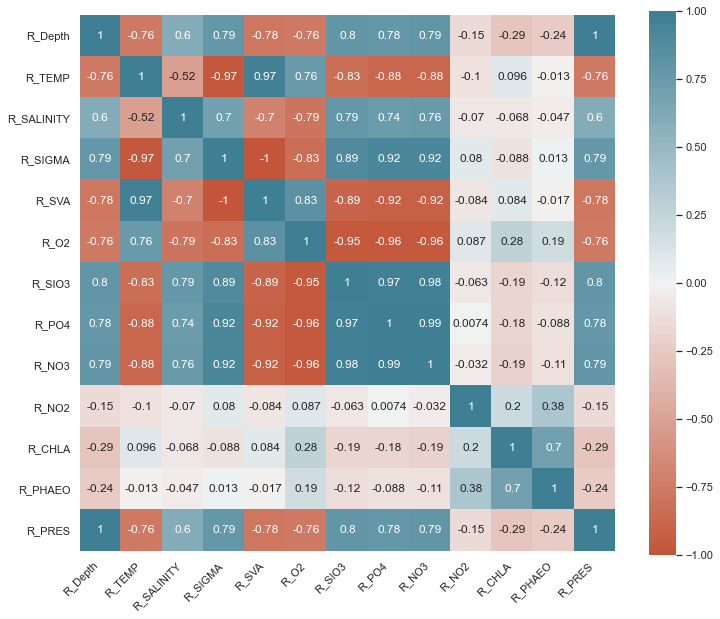

In [19]:
bottle_corrMatrix = bottle_scaled.corr()

sns.set(rc={'figure.figsize':(12,10)})

ax = sns.heatmap(
    bottle_corrMatrix, 
    annot = True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

plt.show()


In [20]:
sorted_mat = bottle_corrMatrix.unstack().sort_values()
print(sorted_mat)

R_SIGMA     R_SVA        -0.999919
R_SVA       R_SIGMA      -0.999919
R_TEMP      R_SIGMA      -0.971624
R_SIGMA     R_TEMP       -0.971624
R_O2        R_NO3        -0.957467
R_NO3       R_O2         -0.957467
R_O2        R_PO4        -0.955747
R_PO4       R_O2         -0.955747
R_SIO3      R_O2         -0.954452
R_O2        R_SIO3       -0.954452
R_SVA       R_PO4        -0.922238
R_PO4       R_SVA        -0.922238
R_NO3       R_SVA        -0.921339
R_SVA       R_NO3        -0.921339
R_SIO3      R_SVA        -0.889508
R_SVA       R_SIO3       -0.889508
R_TEMP      R_PO4        -0.880838
R_PO4       R_TEMP       -0.880838
R_NO3       R_TEMP       -0.876685
R_TEMP      R_NO3        -0.876685
R_SIGMA     R_O2         -0.832728
R_O2        R_SIGMA      -0.832728
R_TEMP      R_SIO3       -0.830919
R_SIO3      R_TEMP       -0.830919
R_SALINITY  R_O2         -0.793498
R_O2        R_SALINITY   -0.793498
R_SVA       R_PRES       -0.778289
R_PRES      R_SVA        -0.778289
R_SVA       R_Depth 

# 3.	Perform linear regression on the dataset to see if you can predict water temperature based on salinity. 

In [21]:
x = np.array(bottle_scaled['R_SALINITY']).reshape((-1, 1))
y = np.array(bottle_scaled['R_TEMP'])

model = LinearRegression().fit(x, y)

print('X-Reshape intercept:', model.intercept_)
print('slope:', model.coef_)


new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print('Y-Reshape intercept:', new_model.intercept_)
print('slope:', new_model.coef_)


y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

X-Reshape intercept: 1.5549303771726988e-14
slope: [-0.51613276]
Y-Reshape intercept: [1.55493038e-14]
slope: [[-0.51613276]]
predicted response:
[0.01370712 0.01370712 0.01710365 ... 0.14447368 0.15975808 0.19032688]


# 4.	Find your mean squared error and R2 values. Be sure to indicate what these tell you. You can import these from sklearn.metrics . 

In [22]:
y_true = y

# The smaller the mean squared error, the closer you are to finding the line of best fit.
print('mean squared error: ',mean_squared_error(y_true, y_pred))

r_sq = model.score(x, y)
# R-squared is a goodness-of-fit measure for linear regression models. 
# This statistic indicates the percentage of the variance in the dependent variable that the independent variables 
#    explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable
#    on a convenient 0 – 100% scale.
print('R-Squared: ', r_sq)

mean squared error:  0.733606970439342
R-Squared:  0.266393029560658


# 5.	Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the predicted temperature values

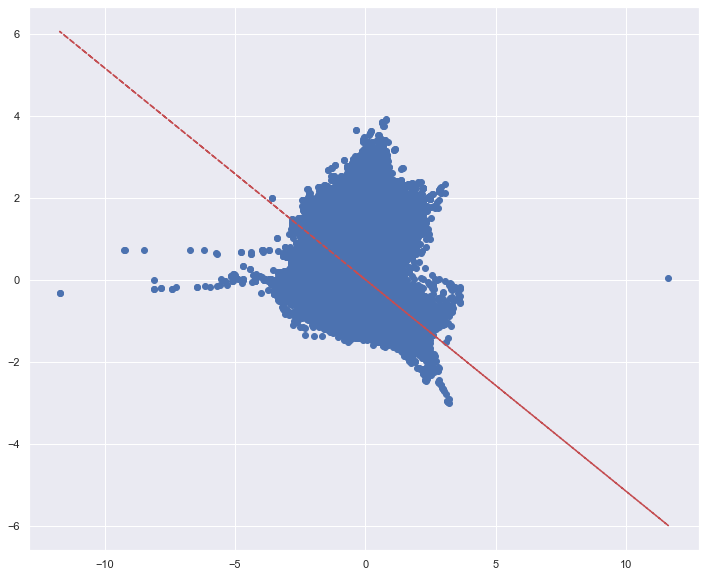

In [23]:
x = bottle_scaled['R_SALINITY']
y = bottle_scaled['R_TEMP']

plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")


# 6.	Do some research on polynomial regression. Describe what it is and how it works in markdown. This article is useful https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/ 

With polynomial regression, the dependent variable of y

Polynomial features (columns) are created by raising an established feature (column) to an exponent $x^2$, $x^3$, rarely $x^4$, and are used to add more details on how the data can be viewed. In short, it takes the data and raises it to a higher degree mathematically so that it be more easily seen (think the 9 minute short film "The Powers of 10" made by the Office of Charles and Ray Eams for IBM in 1977 https://youtu.be/0fKBhvDjuy0) 
    * There is a "Degree" of polynomial which means is the value squared or cubed or even greater. The average degree is 2 or 3 because anything higher would pad out the data to an obnoxious amount and do really strange things in graphing. If you have a house, and you want to get an idea of what the neighborhood looks like, one does not look at the entire planet.

With Polynomial Regression - it is essenially linear regression using polynomial features and because of the enhancement, allows the model to adjust to fit non-linear patterns, thereby improving the model's accuracy - going from hundreds of variables to thousands or even millions.

How it Works: <br>

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

* Importing the dataset
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

* Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

* Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

* Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

* Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

* Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

* Predicting a new result with Linear Regression
lin_reg.predict([[5.5]])
* output should be 249500

* Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[5.5]]))
* output should be 132148.43750003

# 7.	Perform polynomial regression on this same dataset. Train and validate your model as you did when you used linear regression. Mean squared error and R2 both apply here. 

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

X = np.array(bottle_scaled['R_SALINITY']).reshape((-1, 1))
y = np.array(bottle_scaled['R_TEMP'])

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)


y_true = y
print('mean squared error: ',mean_squared_error(y_true, y_pred))

r_sq = model.score(X, y)
print('R-Squared: ', r_sq)


mean squared error:  0.733606970439342
R-Squared:  0.266393029560658


# 8.	Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the polynomial regression predicted temperature values. The resulting trend line should be curved. 

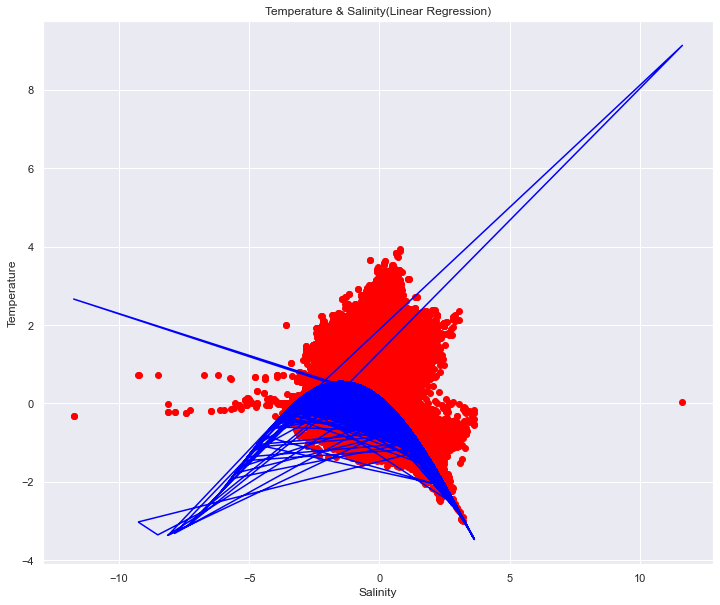

In [28]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Temperature & Salinity(Linear Regression)')
    plt.xlabel('Salinity')
    plt.ylabel('Temperature')
    plt.show()
    return
viz_polymonial()